In [36]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy.stats
import csv 
from fitter import Fitter, get_common_distributions, get_distributions

In [37]:
ruta_csv = 'student-por.csv'
df = pd.read_csv(ruta_csv, delimiter = ';')
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


In [38]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


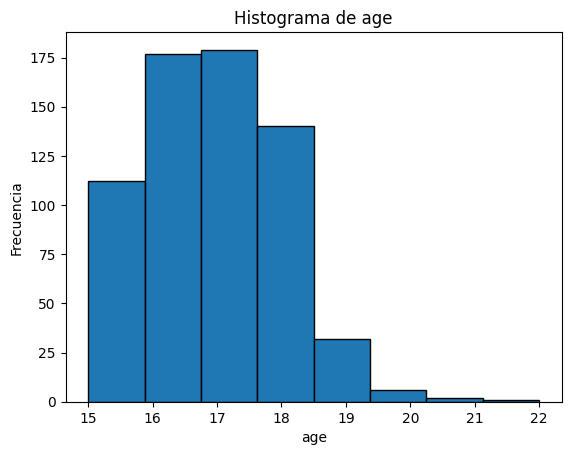

In [39]:
from scipy.stats import probplot
import matplotlib.pyplot as plt
import pandas as pd
variable_of_interest = 'age'

# Crea el histograma
plt.hist(df[variable_of_interest], bins=8, edgecolor='black')  # Puedes ajustar el número de bins según sea necesario
plt.title(f'Histograma de {variable_of_interest}')
plt.xlabel(variable_of_interest)
plt.ylabel('Frecuencia')
plt.show()

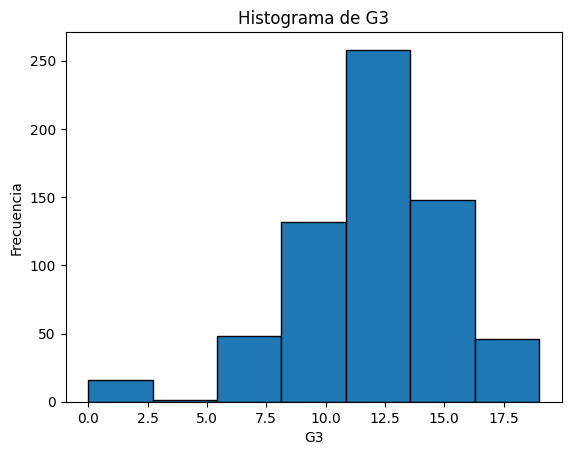

In [40]:
variable_of_interest = 'G3'

# Crea el histograma
plt.hist(df[variable_of_interest], bins=7, edgecolor='black')  # Puedes ajustar el número de bins según sea necesario
plt.title(f'Histograma de {variable_of_interest}')
plt.xlabel(variable_of_interest)
plt.ylabel('Frecuencia')
plt.show()

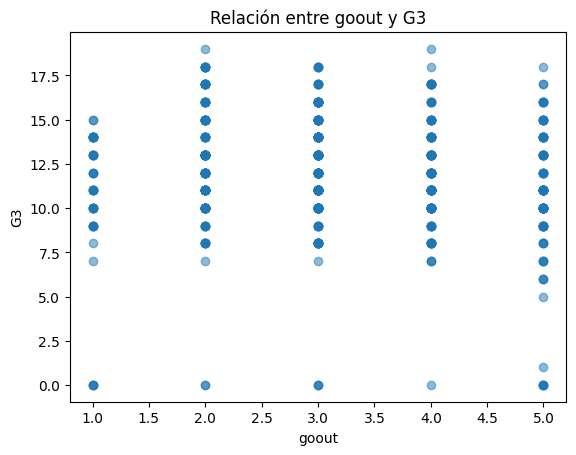

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo que ya has leído el DataFrame df desde el archivo CSV

# Selecciona las variables de interés
variable_x = 'goout'
variable_y = 'G3'

# Crea el gráfico de dispersión
plt.scatter(df[variable_x], df[variable_y], alpha=0.5)
plt.title(f'Relación entre {variable_x} y {variable_y}')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.show()


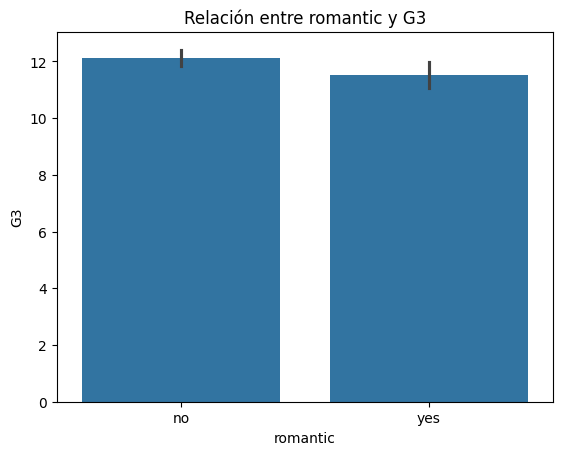

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo que ya has leído el DataFrame df desde el archivo CSV

# Selecciona las variables de interés
variable_x = 'romantic'
variable_y = 'G3'

# Crea un gráfico de barras utilizando seaborn
sns.barplot(x=variable_x, y=variable_y, data=df)
plt.title(f'Relación entre {variable_x} y {variable_y}')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.show()


<Axes: >

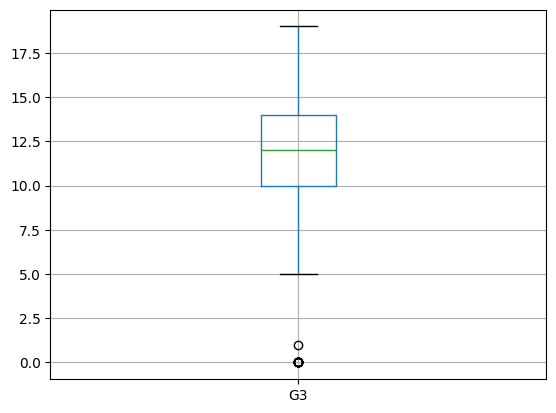

In [43]:
df.boxplot(column="G3")

In [47]:
g3 = df["G3"].values

In [48]:
f = Fitter(g3,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

NameError: name 'height' is not defined